In [190]:
# Import Data
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import mplcursors
import numpy as np 
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator
bond_price = pd.read_csv("data/BondPrice.csv")
bond_quant = pd.read_csv("data/BondQuant.csv") 

In [191]:
# Six Percent Loan of 1812 
# L1: 20048 
# Price history
six_percent_prices = bond_price[bond_price["L1 ID"] == 20048] 
six_percent_quant = bond_quant[bond_quant["L1 ID"] == 20048] 
# Drop columns with NaN 
clean_six_percent_prices = six_percent_prices.dropna(axis=1) 

subset_cols = six_percent_quant.columns[2:] 
temp_clean_six_percent_quant = six_percent_quant.dropna(how="all", subset=subset_cols).dropna(axis=1)
# print(clean_six_percent_prices)
print(temp_clean_six_percent_quant)

# Define the threshold
threshold = 0.001
# Function to check if all values in a column are close to zero
def is_close_to_zero(col, threshold):
    return np.all(np.abs(col) < threshold)

cols_to_drop = [col for col in temp_clean_six_percent_quant.iloc[:, 2:].columns if is_close_to_zero(temp_clean_six_percent_quant[col], threshold)]

# Drop the columns
clean_six_percent_quant = temp_clean_six_percent_quant.drop(columns=cols_to_drop)
print(clean_six_percent_quant) 

     L1 ID              Series  1812-06-30  1812-09-30  1812-12-31  \
238  20048  Active Outstanding   2977912.5   5434712.5   7792000.0   
241  20048     Public Holdings   2977912.5   5434712.5   7792000.0   
242  20048   Total Outstanding   2977912.5   5434712.5   7792000.0   

     1813-03-31  1813-06-30  1813-09-30  1813-12-31  1814-03-31  ...  \
238   7710500.0   7710500.0   7710500.0   7710500.0   7710500.0  ...   
241   7710500.0   7710500.0   7710500.0   7710500.0   7710500.0  ...   
242   7710500.0   7710500.0   7710500.0   7710500.0   7710500.0  ...   

       1837-09-30    1837-12-31    1838-03-31    1838-06-30    1838-09-30  \
238 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10   
241 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10   
242 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10   

       1838-12-31    1839-03-31    1839-06-30    1839-09-30    1839-12-31  
238 -9.313226e-10 -9.313226e-10 -9.313226e-10

In [192]:
# Reformat dataframe 
six_percent_prices_melted = clean_six_percent_prices.melt(var_name='Timestamp', value_name='Price')
six_percent_prices_melted = six_percent_prices_melted.iloc[2:].reset_index(drop=True)
# print(six_percent_prices_melted)

# Bond quantities 
active_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Active Outstanding"].melt(var_name='Timestamp', value_name='Quant')
active_outstanding = active_outstanding.iloc[2:].reset_index(drop=True)
print(active_outstanding)

public_holdings = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Public Holdings"].melt(var_name='Timestamp', value_name='Quant')
public_holdings = public_holdings.iloc[2:].reset_index(drop=True)
print(public_holdings)

total_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Total Outstanding"].melt(var_name='Timestamp', value_name='Quant')
total_outstanding = total_outstanding.iloc[2:].reset_index(drop=True)
print(total_outstanding)

     Timestamp      Quant
0   1812-06-30  2977912.5
1   1812-09-30  5434712.5
2   1812-12-31  7792000.0
3   1813-03-31  7710500.0
4   1813-06-30  7710500.0
..         ...        ...
78  1831-12-31      500.0
79  1832-03-31      500.0
80  1832-06-30      500.0
81  1832-09-30      500.0
82  1832-12-31      500.0

[83 rows x 2 columns]
     Timestamp      Quant
0   1812-06-30  2977912.5
1   1812-09-30  5434712.5
2   1812-12-31  7792000.0
3   1813-03-31  7710500.0
4   1813-06-30  7710500.0
..         ...        ...
78  1831-12-31      500.0
79  1832-03-31      500.0
80  1832-06-30      500.0
81  1832-09-30      500.0
82  1832-12-31      500.0

[83 rows x 2 columns]
     Timestamp      Quant
0   1812-06-30  2977912.5
1   1812-09-30  5434712.5
2   1812-12-31  7792000.0
3   1813-03-31  7710500.0
4   1813-06-30  7710500.0
..         ...        ...
78  1831-12-31      500.0
79  1832-03-31      500.0
80  1832-06-30      500.0
81  1832-09-30      500.0
82  1832-12-31      500.0

[83 rows x 2 colu

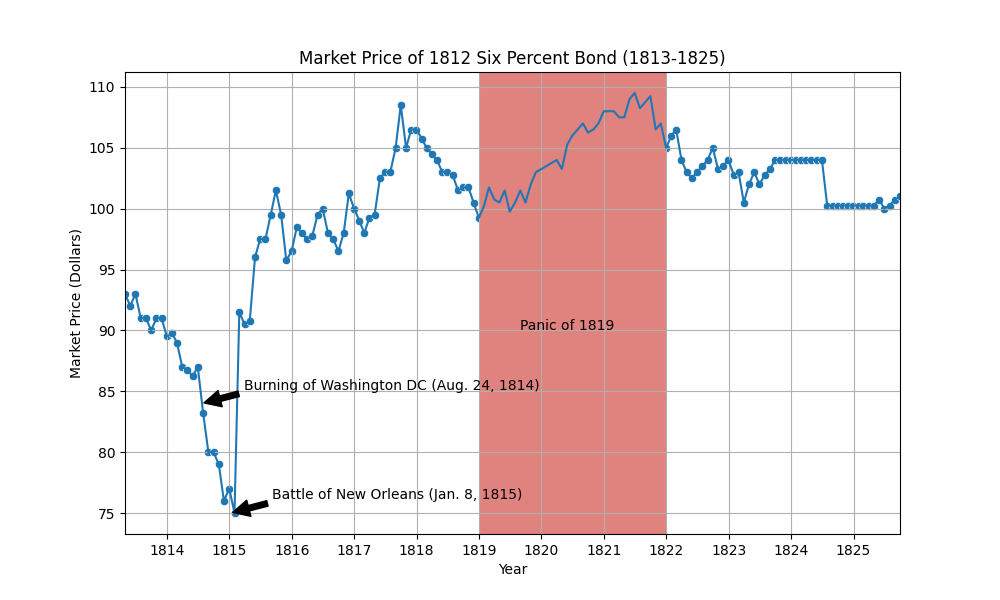

In [193]:
%matplotlib widget
# Graph dataframe 
six_percent_prices_melted['Timestamp'] = pd.to_datetime(six_percent_prices_melted['Timestamp'])

# Set up Seaborn plot
fig, ax = plt.subplots(figsize=(10, 6))
#ax.plot(six_percent_prices_melted['Timestamp'], six_percent_prices_melted['Price'])
#dots = ax.scatter(x, y, color='none')
scatplot = sns.scatterplot(data=six_percent_prices_melted, x='Timestamp', y='Price', marker='o')
scatplot.axvspan(xmin=pd.Timestamp("1819"), xmax=pd.Timestamp("1822"), fc="#E0837F")

# Format x-axis ticks to show year 
date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(YearLocator())
# plt.gca().xaxis.set_major_locator(MonthLocator(interval=4))

# Get the minimum and maximum dates with data (assuming 'date' is a datetime type)
min_date = six_percent_prices_melted['Timestamp'].min()
max_date = six_percent_prices_melted['Timestamp'].max()

# Set the x-axis limits to exclude extra years
plt.xlim(min_date, max_date)

# Enhance plot aesthetics (optional)
plt.xlabel('Year')
plt.ylabel('Market Price (Dollars)')
plt.title('Market Price of 1812 Six Percent Bond (1813-1825)')
plt.grid(True)

# Add hovering features 
def show_hover_panel(get_text_func=None):
    cursor = mplcursors.cursor(
        scatplot, 
        hover=2,  # Transient
        annotation_kwargs=dict(
            bbox=dict(
                boxstyle="square,pad=0.5",
                facecolor="white",
                edgecolor="#ddd",
                linewidth=0.5,
                path_effects=[pe.withSimplePatchShadow(offset=(1.5, -1.5))],
            ),
            linespacing=1.5,
            arrowprops=None,
        ),
        highlight=True,
        highlight_kwargs=dict(linewidth=2),
    )

    if get_text_func:
        cursor.connect(
            event="add",
            func=lambda sel: sel.annotation.set_text(get_text_func(sel.index)),
        )

    return cursor


def on_add(index):
    item = six_percent_prices_melted.iloc[index]
    parts = [
        f"Date: {item.Timestamp.strftime('%Y-%m-%d')}",
        f"Price: {item.Price:,.2f}",
    ]

    return "\n".join(parts)


show_hover_panel(on_add)

ax.text(pd.Timestamp("1820-06"), 90, 'Panic of 1819', horizontalalignment='center')

ax.annotate('Burning of Washington DC (Aug. 24, 1814)',
            xy=(pd.Timestamp("1814-7-24"), 84), xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Battle of New Orleans (Jan. 8, 1815)',
            xy=(pd.Timestamp("1815-1-08"), 75), xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(six_percent_prices_melted['Timestamp'], six_percent_prices_melted['Price'])

plt.show()

#TODO
# Add some arrows pointing to some historical events 
# Add interactive elements - dragger 

In [194]:
# reformat dataframe to create separate timestamp and price columns 
# drop NaN columns 
def melt_clean_price(df):
    # Drop columns with NaN 
    clean_df = df.dropna(axis=1) 
    df_melted = clean_df.melt(var_name='Timestamp', value_name='Price')
    df_melted = df_melted.iloc[2:].reset_index(drop=True)
    return df_melted

# Graph for price function
def graph_price(df, title):
    # convert timestamp dtype into datetime dtype
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Set up Seaborn plot
    fig, ax = plt.subplots(figsize=(10, 6))
    scatplot = sns.scatterplot(data=df, x='Timestamp', y='Price', marker='o')
    #scatplot.axvspan(xmin=pd.Timestamp("1819"), xmax=pd.Timestamp("1822"), fc="#E0837F")
    # Format x-axis ticks to show year 
    date_form = DateFormatter("%Y")
    plt.gca().xaxis.set_major_formatter(date_form)
    plt.gca().xaxis.set_major_locator(YearLocator())
    # Get the minimum and maximum dates with data (assuming 'date' is a datetime type)
    min_date = df['Timestamp'].min()
    max_date = df['Timestamp'].max()
    # Set the x-axis limits to exclude extra years
    plt.xlim(min_date, max_date)

    # Enhance plot aesthetics (optional)
    plt.xlabel('Year')
    plt.ylabel('Market Price (Dollars)')
    plt.title(title)
    plt.grid(True)

    # Add hovering features 
    def show_hover_panel(get_text_func=None):
        cursor = mplcursors.cursor(
            scatplot, 
            hover=2,  # Transient
            annotation_kwargs=dict(
                bbox=dict(
                    boxstyle="square,pad=0.5",
                    facecolor="white",
                    edgecolor="#ddd",
                    linewidth=0.5,
                    path_effects=[pe.withSimplePatchShadow(offset=(1.5, -1.5))],
                ),
                linespacing=1.5,
                arrowprops=None,
            ),
            highlight=True,
            highlight_kwargs=dict(linewidth=2),
        )
    
        if get_text_func:
            cursor.connect(
                event="add",
                func=lambda sel: sel.annotation.set_text(get_text_func(df, sel.index)),
            )
    
        return cursor
    
    
    def on_add(df, index):
        item = df.iloc[index]
        parts = [
            f"Date: {item.Timestamp.strftime('%Y-%m-%d')}",
            f"Price: {item.Price:,.2f}",
        ]
    
        return "\n".join(parts)

    show_hover_panel(on_add) # add cursor hover features 

    plt.plot(df['Timestamp'], df['Price'])
    
    return plt # return completed figure 

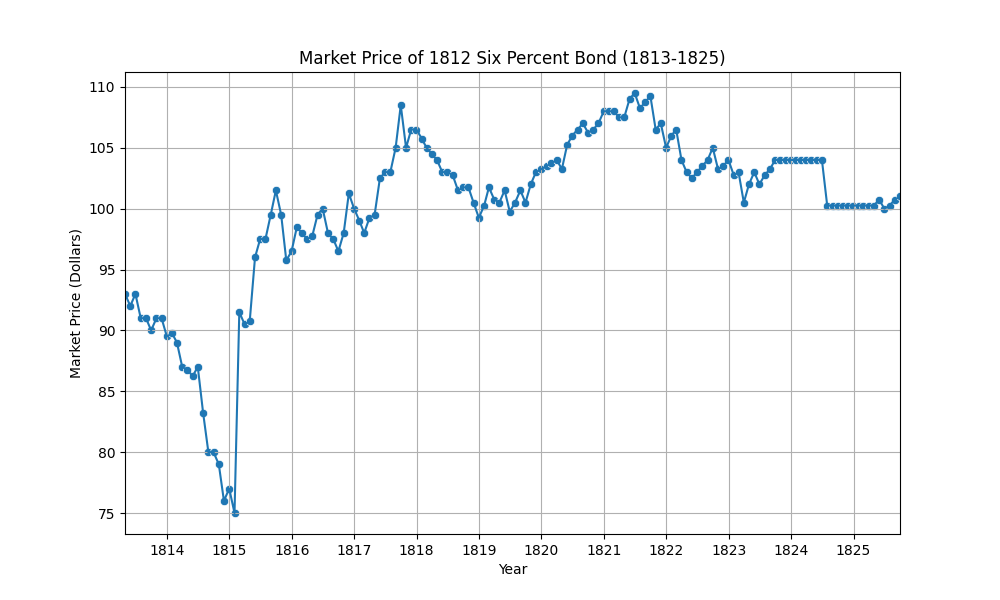

In [195]:
# Six percent loan of 1812 
six_percent_prices = bond_price[bond_price["L1 ID"] == 20048] 
six_percent_prices_melted = melt_clean_price(six_percent_prices) # clean and melt (reformat) dataframe 
six_percent = graph_price(six_percent_prices_melted, 'Market Price of 1812 Six Percent Bond (1813-1825)')
six_percent.show()

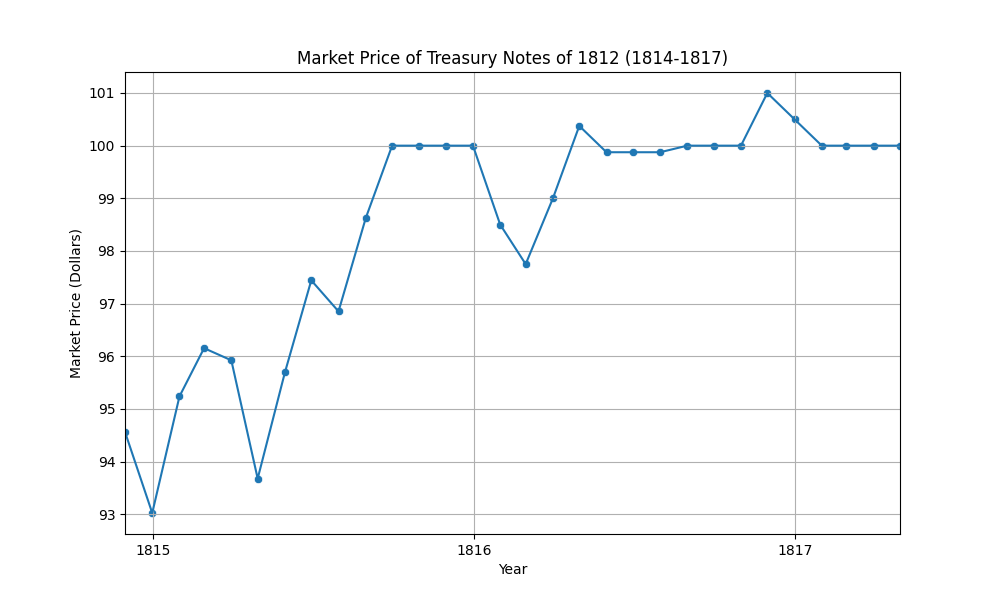

In [196]:
# treasury notes of 1812 prices 
treasure_notes_prices = bond_price[bond_price["L1 ID"] == 20050] 
treasure_notes_melted = melt_clean_price(treasure_notes_prices) # clean and melt (reformat) dataframe 
# print(treasure_notes_melted) 
treasure_notes = graph_price(treasure_notes_melted, 'Market Price of Treasury Notes of 1812 (1814-1817)')
treasure_notes.show()

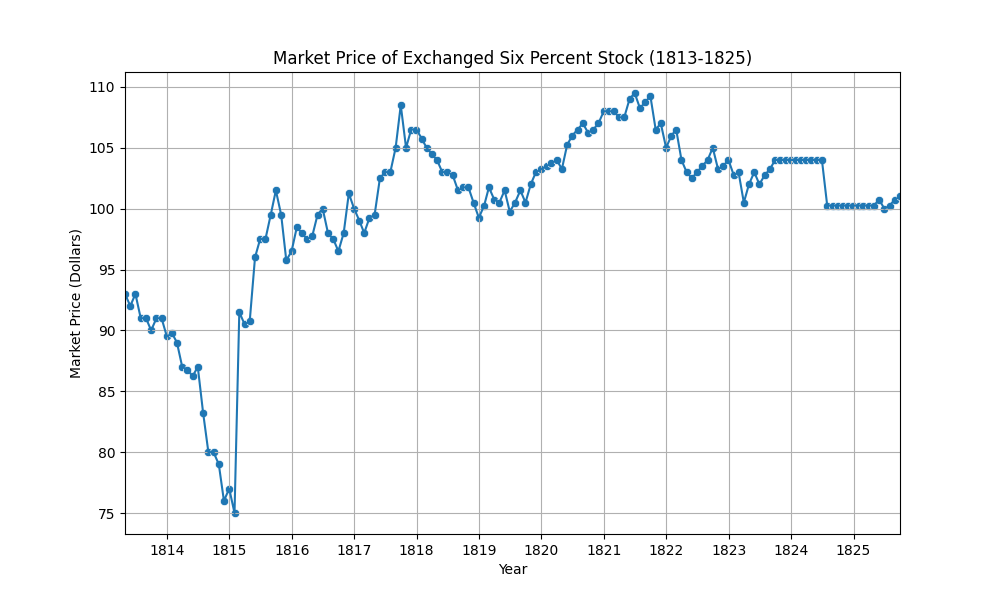

In [197]:
# Exchanged 6% stock 
exchanged_six_prices = bond_price[bond_price["L1 ID"] == 20051] 
exchanged_six_melted = melt_clean_price(exchanged_six_prices) # clean and melt (reformat) dataframe 
exchanged_six = graph_price(exchanged_six_melted, 'Market Price of Exchanged Six Percent Stock (1813-1825)') 
exchanged_six.show()

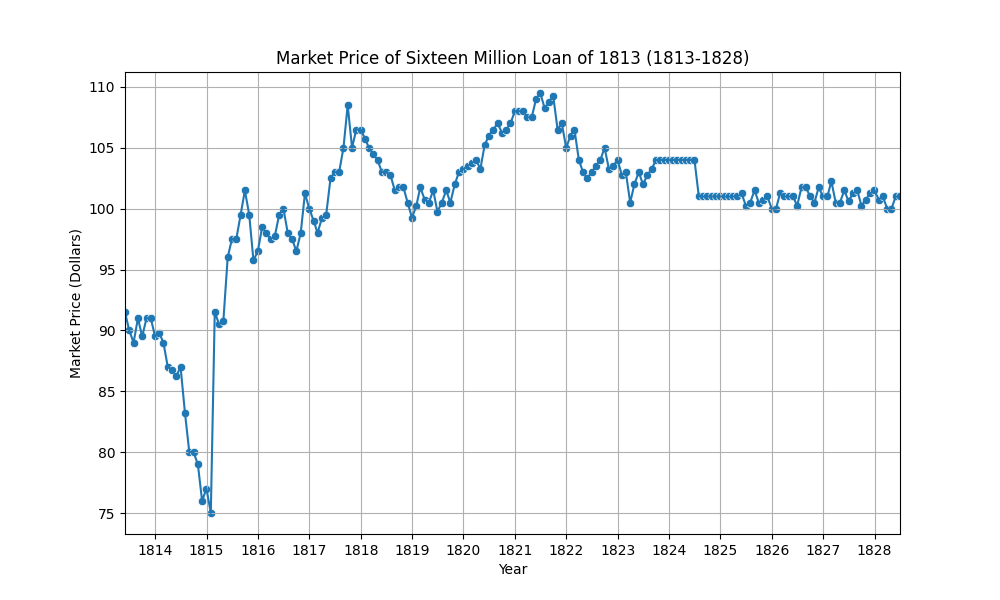

In [198]:
# Sixteen million loan of 1813 
sixteen_mil_prices = bond_price[bond_price["L1 ID"] == 20052] 
sixteen_mil_melted = melt_clean_price(sixteen_mil_prices) # clean and melt (reformat) dataframe 
sixteen_mil = graph_price(sixteen_mil_melted, 'Market Price of Sixteen Million Loan of 1813 (1813-1828)') 
sixteen_mil.show()

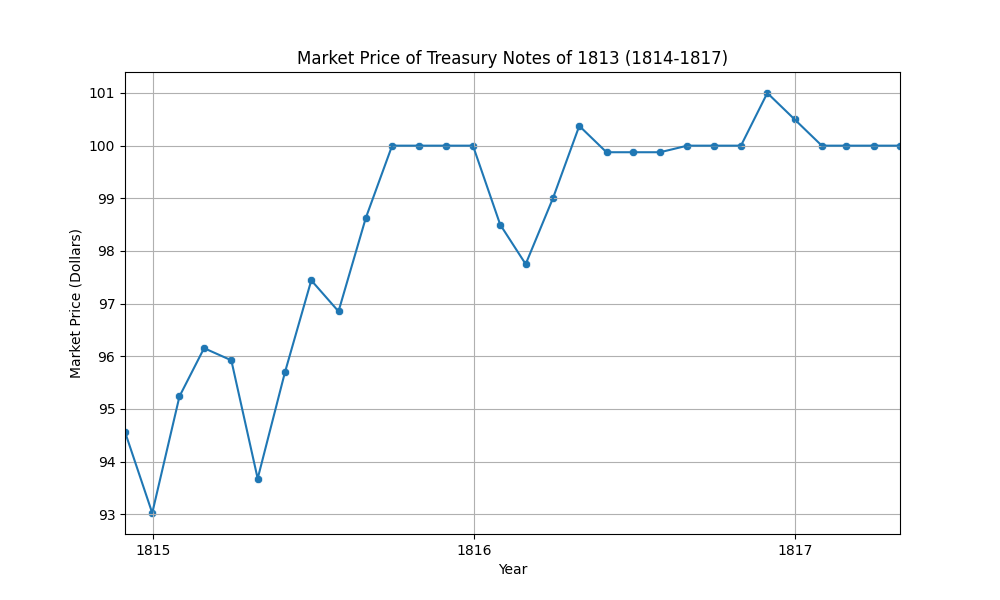

In [199]:
# Treasury Notes of 1813 
treasury_notes_1813_prices = bond_price[bond_price["L1 ID"] == 20053] 
treasury_notes_1813_melted = melt_clean_price(treasury_notes_1813_prices) # clean and melt (reformat) dataframe 
treasury_notes_1813 = graph_price(treasury_notes_1813_melted, 'Market Price of Treasury Notes of 1813 (1814-1817)') 
treasury_notes_1813.show()

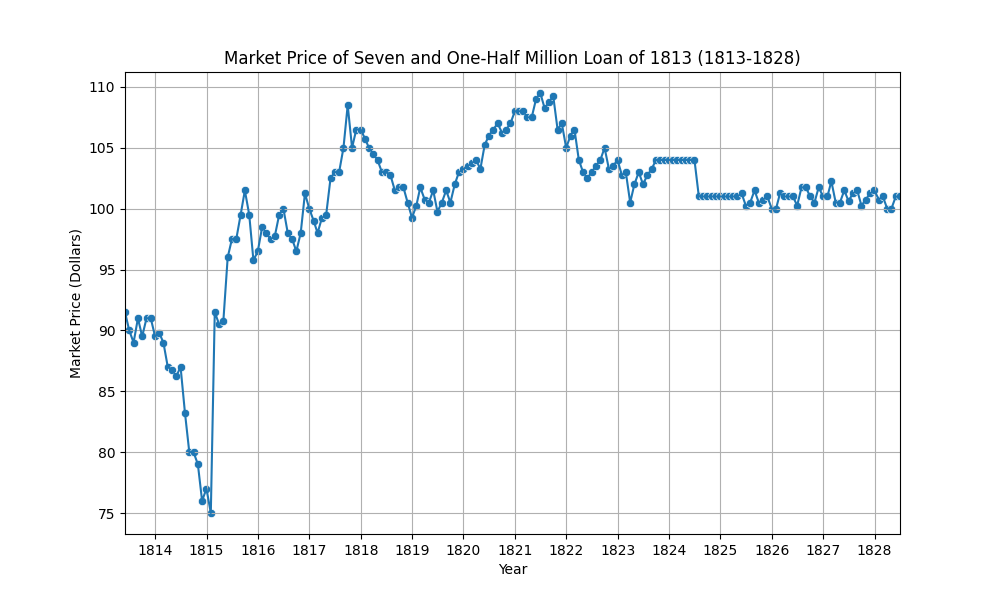

In [200]:
# seven and one-half million loan of 1813 
seven_one_half_prices = bond_price[bond_price["L1 ID"] == 20054] 
seven_one_half_melted = melt_clean_price(seven_one_half_prices) # clean and melt (reformat) dataframe 
seven_one_half = graph_price(seven_one_half_melted, 'Market Price of Seven and One-Half Million Loan of 1813 (1813-1828)') 
seven_one_half.show()

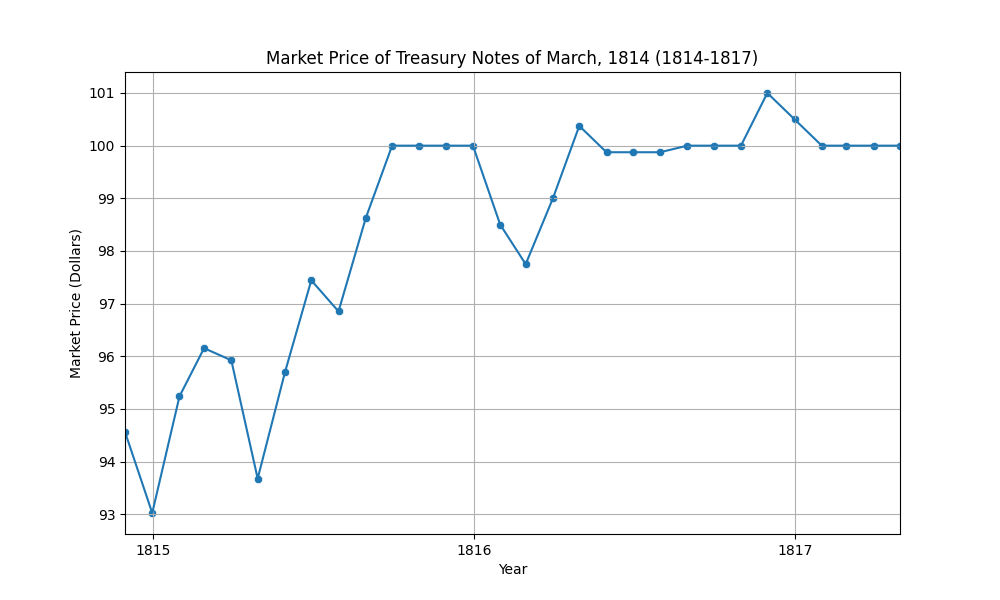

In [201]:
# treasury notes of March, 1814
notes_1814_prices = bond_price[bond_price["L1 ID"] == 20055] 
notes_1814_melted = melt_clean_price(notes_1814_prices) # clean and melt (reformat) dataframe 
notes_1814 = graph_price(notes_1814_melted, "Market Price of Treasury Notes of March, 1814 (1814-1817)")  
notes_1814.show()

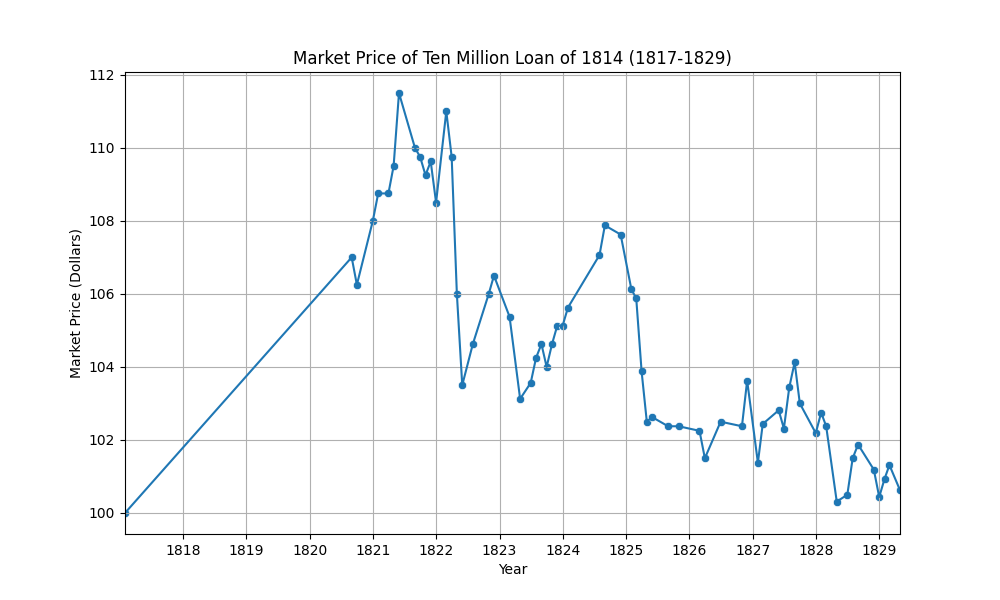

In [202]:
# 10 mil loan of 1814 
ten_mil_prices = bond_price[bond_price["L1 ID"] == 20056] 
ten_mil_melted = melt_clean_price(ten_mil_prices) # clean and melt (reformat) dataframe 
ten_mil = graph_price(ten_mil_melted, "Market Price of Ten Million Loan of 1814 (1817-1829)")  
ten_mil.show()

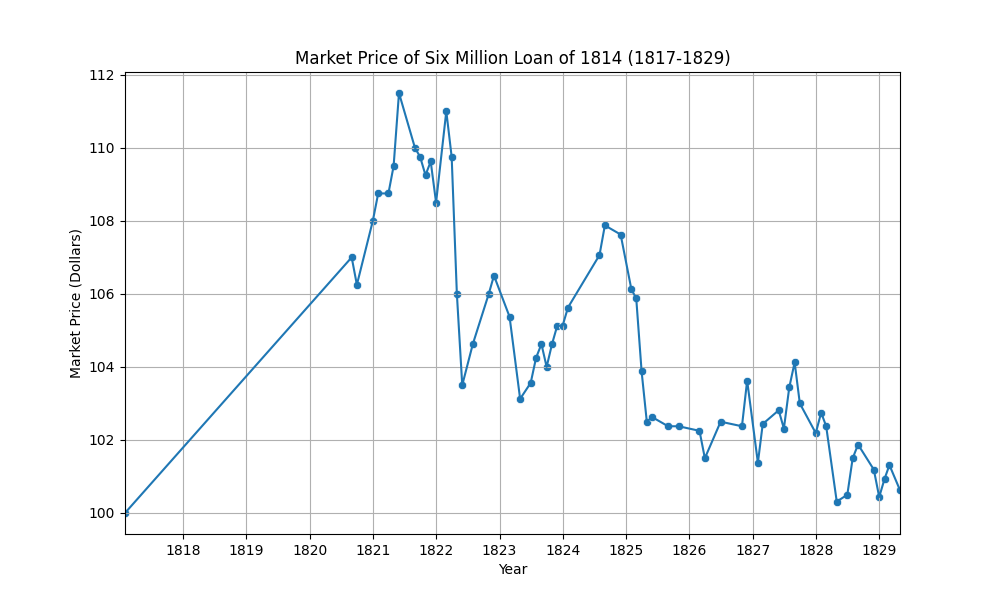

In [217]:
# Six Million Loan of 1814 
six_mil_1814_prices = bond_price[bond_price["L1 ID"] == 20057] 
six_mil_1814_melted = melt_clean_price(six_mil_1814_prices) # clean and melt (reformat) dataframe 
six_mil_1814 = graph_price(six_mil_1814_melted, "Market Price of Six Million Loan of 1814 (1817-1829)")  
six_mil_1814.show()

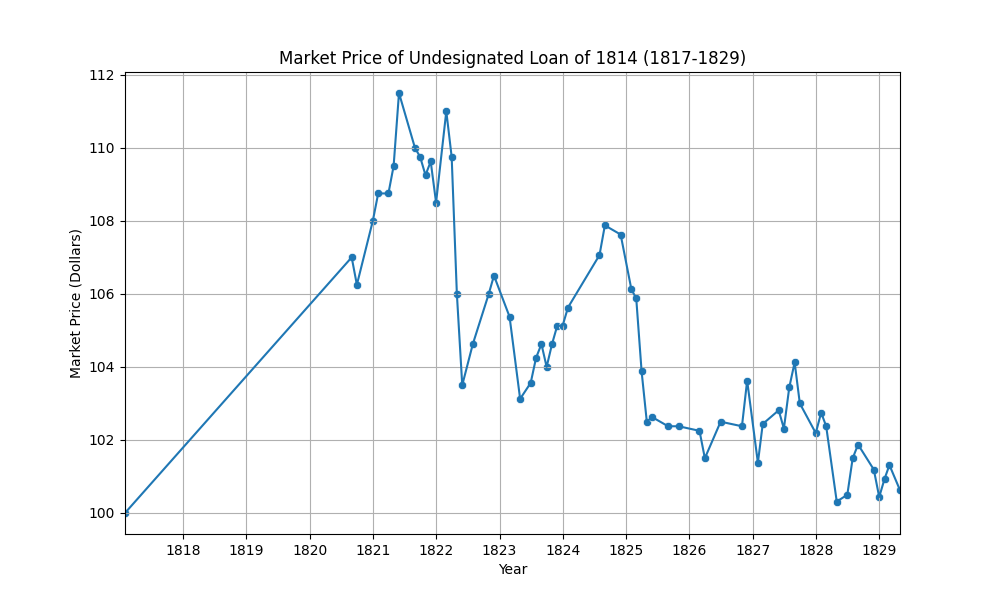

In [211]:
# Undesignated Loan of 1814
undesignated_1814_prices = bond_price[bond_price["L1 ID"] == 20058] 
undesignated_1814_melted = melt_clean_price(undesignated_1814_prices) # clean and melt (reformat) dataframe 
undesignated_1814 = graph_price(undesignated_1814_melted, "Market Price of Undesignated Loan of 1814 (1817-1829)")  
undesignated_1814.show()

In [226]:
# clean quant dataframe 
# returns a series with chosen row 
def clean_quant(quant_df):
    subset_cols = quant_df.columns[2:] 
    # Drop rows where all columns are Nan 
    temp_clean_quant_df = quant_df.dropna(how="all", subset=subset_cols).dropna(axis=1)
    # print(clean_six_percent_prices)
    # print(temp_clean_six_percent_quant)
    
    # Define the threshold
    threshold = 0.001
    # Function to check if all values in a column are close to zero
    def is_close_to_zero(col, threshold):
        return np.all(np.abs(col) < threshold)
    
    cols_to_drop = [col for col in temp_clean_quant_df.iloc[:, 2:].columns if is_close_to_zero(temp_clean_quant_df[col], threshold)]
    
    # Drop the columns
    clean_quant_df = temp_clean_quant_df.drop(columns=cols_to_drop)
    return clean_quant_df
    # print(clean_quant_df) 

def reformat_quant(clean_quant_df, row):
    # reformat dataframe to include timestamp and quant columns 
    series_data = clean_quant_df[clean_quant_df["Series"] == row].melt(var_name='Timestamp', value_name='Quant')
    series_data = series_data.iloc[2:].reset_index(drop=True)
    series_data['Timestamp'] = pd.to_datetime(series_data['Timestamp']) #convert timestamp column to a datetime object 
    return series_data # return the selected row 

# graphing function
def graph_quant(df, title):
    # Set up Seaborn plot
    fig, ax = plt.subplots(figsize=(10, 6))
    scatplot = sns.lineplot(data=df, x="Timestamp", y="Quant") 
    #scatplot.axvspan(xmin=pd.Timestamp("1819"), xmax=pd.Timestamp("1822"), fc="#E0837F")
    # Format x-axis ticks to show year 
    date_form = DateFormatter("%Y")
    plt.gca().xaxis.set_major_formatter(date_form)
    plt.gca().xaxis.set_major_locator(YearLocator())
    # Get the minimum and maximum dates with data (assuming 'date' is a datetime type)
    min_date = df['Timestamp'].min()
    max_date = df['Timestamp'].max()
    # Set the x-axis limits to exclude extra years
    plt.xlim(min_date, max_date)

    # Enhance plot aesthetics (optional)
    plt.xlabel('Year')
    plt.ylabel('Total Outstanding (Number of Bonds)')
    plt.title(title)
    plt.grid(True)

    plt.plot(df['Timestamp'], df['Quant'])
    return plt

    Timestamp      Quant
0  1814-12-31   150000.0
1  1815-03-31  334032.22
2  1815-06-30  408622.97
3  1815-09-30  408622.97
4  1815-12-31  408622.97
..        ...        ...
74 1833-06-30    1760.91
75 1833-09-30    1760.91
76 1833-12-31    1760.91
77 1834-03-31    1760.91
78 1834-06-30    1760.91

[79 rows x 2 columns]
    Timestamp      Quant
0  1814-12-31   150000.0
1  1815-03-31  334032.22
2  1815-06-30  408622.97
3  1815-09-30  408622.97
4  1815-12-31  408622.97
..        ...        ...
74 1833-06-30    1760.91
75 1833-09-30    1760.91
76 1833-12-31    1760.91
77 1834-03-31    1760.91
78 1834-06-30    1760.91

[79 rows x 2 columns]


'\n# Bond quantities \nactive_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Active Outstanding"].melt(var_name=\'Timestamp\', value_name=\'Quant\')\nactive_outstanding = active_outstanding.iloc[2:].reset_index(drop=True)\nprint(active_outstanding)\n\npublic_holdings = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Public Holdings"].melt(var_name=\'Timestamp\', value_name=\'Quant\')\npublic_holdings = public_holdings.iloc[2:].reset_index(drop=True)\nprint(public_holdings)\n\ntotal_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Total Outstanding"].melt(var_name=\'Timestamp\', value_name=\'Quant\')\ntotal_outstanding = total_outstanding.iloc[2:].reset_index(drop=True)\nprint(total_outstanding)\n'

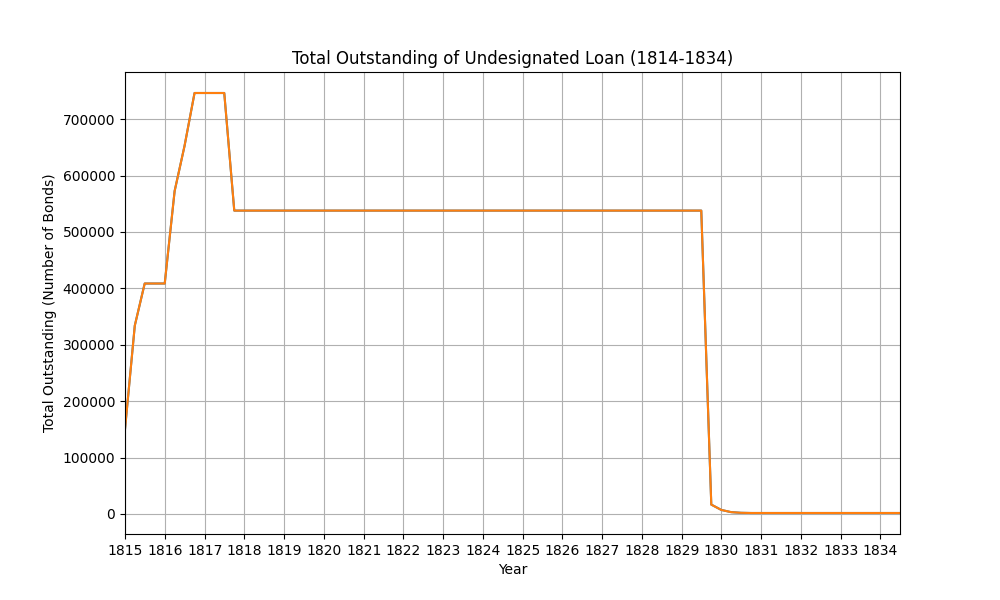

In [228]:
undesignated_1814_quant = bond_quant[bond_quant["L1 ID"] == 20058]
clean_undesignated_1814_quant = clean_quant(undesignated_1814_quant)
#print(clean_undesignated_1814_quant) 
total_outstanding = reformat_quant(clean_undesignated_1814_quant, "Total Outstanding")
print(total_outstanding)
total_outstanding_plot = graph_quant(total_outstanding, "Total Outstanding of Undesignated Loan (1814-1834)") 
#total_outstanding_plot.show()

public_holdings = reformat_quant(clean_undesignated_1814_quant, "Public Holdings")
print(public_holdings)
print(public
"""
# Bond quantities 
active_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Active Outstanding"].melt(var_name='Timestamp', value_name='Quant')
active_outstanding = active_outstanding.iloc[2:].reset_index(drop=True)
print(active_outstanding)

public_holdings = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Public Holdings"].melt(var_name='Timestamp', value_name='Quant')
public_holdings = public_holdings.iloc[2:].reset_index(drop=True)
print(public_holdings)

total_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Total Outstanding"].melt(var_name='Timestamp', value_name='Quant')
total_outstanding = total_outstanding.iloc[2:].reset_index(drop=True)
print(total_outstanding)
""" 

In [ ]:
# Graph bond quantities 
#set seaborn style 
sns.set_theme() 
plt.close()
#create area chart 
x_timestamps = total_outstanding["Timestamp"] 
x_timestamps = pd.to_datetime(x_timestamps)
y1_active_outstanding = active_outstanding["Quant"].astype(float)
y2_total_outstanding = total_outstanding["Quant"].astype(float)
y3_public_holdings = public_holdings["Quant"].astype(float)
print(y1_active_outstanding.equals(y3_public_holdings))
# print(y2_total_outstanding) 

plt.stackplot(x_timestamps, y1_active_outstanding, 
              y1_active_outstanding, y1_active_outstanding)
plt.show()

Many of these graphs share similarities: why is that? 

True


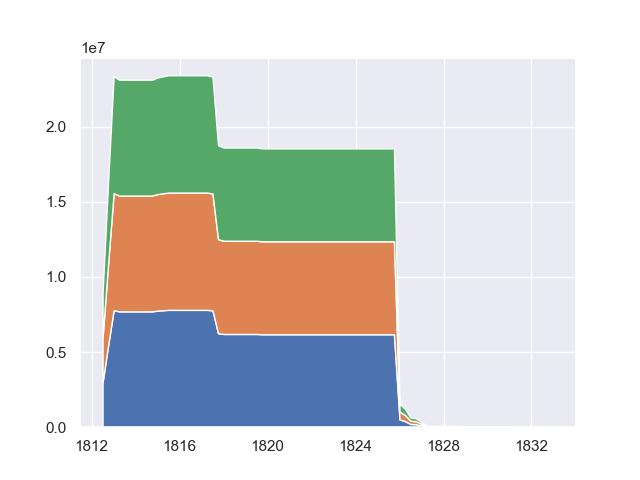

In [ ]:
# Treausury Notes of 1812 
